In [1]:
import os
import sys
import pprint

from tqdm import tqdm
from pathlib import Path
from sklearn.model_selection import train_test_split

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import timm
import torch
import torch.nn as nn
import torch.nn.functional as F

sys.path.append('/app/')
from configs import config
from utils import image_processor

%matplotlib inline


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
config = config.Resnet50dGRU()

## Analyze train data

In [3]:
df_train_class = pd.read_csv(config.train_class)

<Axes: xlabel='class'>

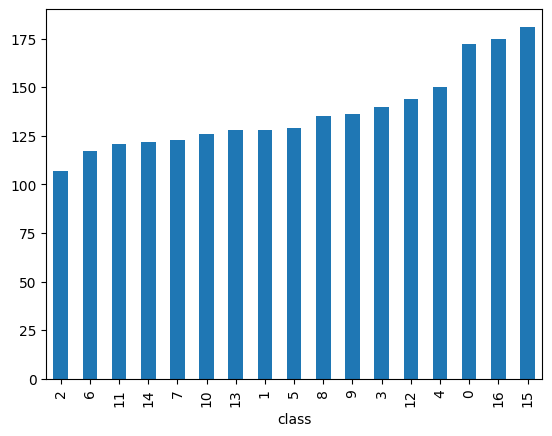

In [4]:
df_train_class['class'].value_counts().sort_values().plot(kind='bar')

## View data

In [5]:
train_paths = [config.train_dir + train_path for train_path in os.listdir(config.train_dir)]
test_paths = [config.test_dir + test_path for test_path in os.listdir(config.test_dir)]
print(len(train_paths))

2334


In [6]:
secelt_n = 100
cap = cv2.VideoCapture(train_paths[secelt_n])
ret, img = cap.read()
print(img.shape)
print(cap.get(cv2.CAP_PROP_FPS))
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

(640, 360, 3)
30.0
479.0


In [46]:
idx = 0
row = df_train_class.loc[idx]
file_name = row.loc['file']
label = row.loc['class']
video_path = config.train_dir + file_name
cap = cv2.VideoCapture(video_path)
n_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
images = []
while True:
   ret, img = cap.read() 
   if not ret:
       break
   images.append(img)
images = torch.from_numpy(np.array(images))
images = images.permute(0, 3, 2, 1)

In [47]:
images.shape

torch.Size([446, 3, 640, 360])

In [9]:
images = image_processor.load_image(video_path)

In [10]:
images = torch.from_numpy(images)

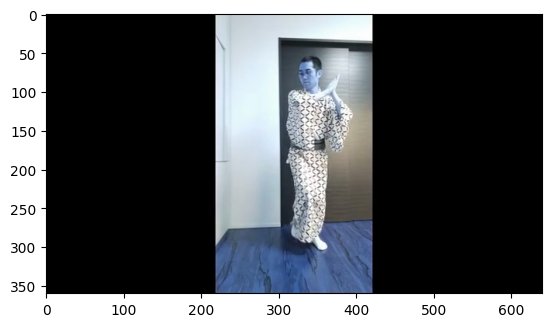

In [11]:
plt.imshow(images[0])

In [15]:
x = df_train_class['class']

In [27]:
file_names = df_train_class['file'].to_list()
classes = df_train_class['class'].to_list()
train_file, valid_file, train_class, valid_class = train_test_split(file_names, classes, test_size=0.2, random_state=42, stratify=classes)

In [30]:
df = pd.DataFrame({'file': train_file, 'class': train_class})

In [38]:
images.dtype

torch.uint8

In [40]:
images.shape

torch.Size([446, 360, 640, 3])

In [48]:
i = F.interpolate(images, size=(256, 256))
i.shape

torch.Size([446, 3, 256, 256])

In [51]:
df_train_class.iloc[0:100]

,file,class
0,train_0000.mp4,15
1,train_0001.mp4,7
2,train_0002.mp4,10
3,train_0003.mp4,10
4,train_0004.mp4,16
...,...,...
95,train_0095.mp4,0
96,train_0096.mp4,1
97,train_0097.mp4,6
98,train_0098.mp4,4
